In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from os import path, system
import sys
from sys import platform
import glob
from scipy import signal
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import time
# from PyQt5.QtWidgets import QFileDialog

# brpylib is the module that contains functions/classes that allow us to open and extract data from .nev and .nsx files
from Python_Utilities import brpylib
from Python_Utilities import brMiscFxns

In [2]:
# Monkey data
monkeyName = "Greyson"
ccmID = "18E2"

# directory info
scrape_dir = '/Volumes/L_MillerLab/data/Greyson_17L2/CerebusData'
if not path.exists(scrape_dir):
    print(f"{scrape_dir} does not exist! Try again!")

In [3]:
%%time
nev_list = glob.glob(f"{scrape_dir}/*/*.nev")
nsx_list = glob.glob(f"{scrape_dir}/*/*.ns*")
# plx_list = glob.glob(f"{scrape_dir}/*/*.plx")
# ccf_list = glob.glob(f"{scrape_dir}/*/*.ccf")

CPU times: user 60.5 ms, sys: 188 ms, total: 249 ms
Wall time: 12.1 s


In [4]:
shortened_nev_list = nev_list[:20]
outputs = []
for nev_filename in shortened_nev_list:
    # open file
    nevobj = brpylib.NevFile(nev_filename)
    output = nevobj.getdata(elec_ids='all')
    outputs.append(output)


20181220_Greyson_FreeReaching_001.nev opened

20181220_Greyson_PG_001.nev opened

20181205_Greyson_PG_002.nev opened

20181205_Greyson_PG_001.nev opened

20200213_Greyson_Cage_003003.nev opened

20200213_Greyson_Cage_005005.nev opened

20200213_Greyson_Cage_010010.nev opened

20200213_Greyson_Cage_004004.nev opened

20200213_Greyson_Cage_016016.nev opened


ValueError: strides is incompatible with shape of requested array and size of buffer

In [13]:
outputs[1]['spike_events'].keys()

dict_keys(['TimeStamps', 'Unit', 'Channel', 'Waveforms'])

In [18]:
for output in outputs:
    print(sum(output['spike_events']['Unit']))

0
0
0
0
0
0
0
0


In [26]:
len(outputs[2]['spike_events']['TimeStamps'])

541664

In [21]:
len(outputs[2]['spike_events']['Channel'])

541664

In [23]:
outputs[2]['spike_events']['Waveforms'].shape

(541664, 96)

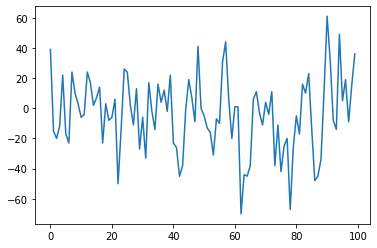

In [24]:
plt.plot(outputs[2]['spike_events']['Waveforms'][:100,0])

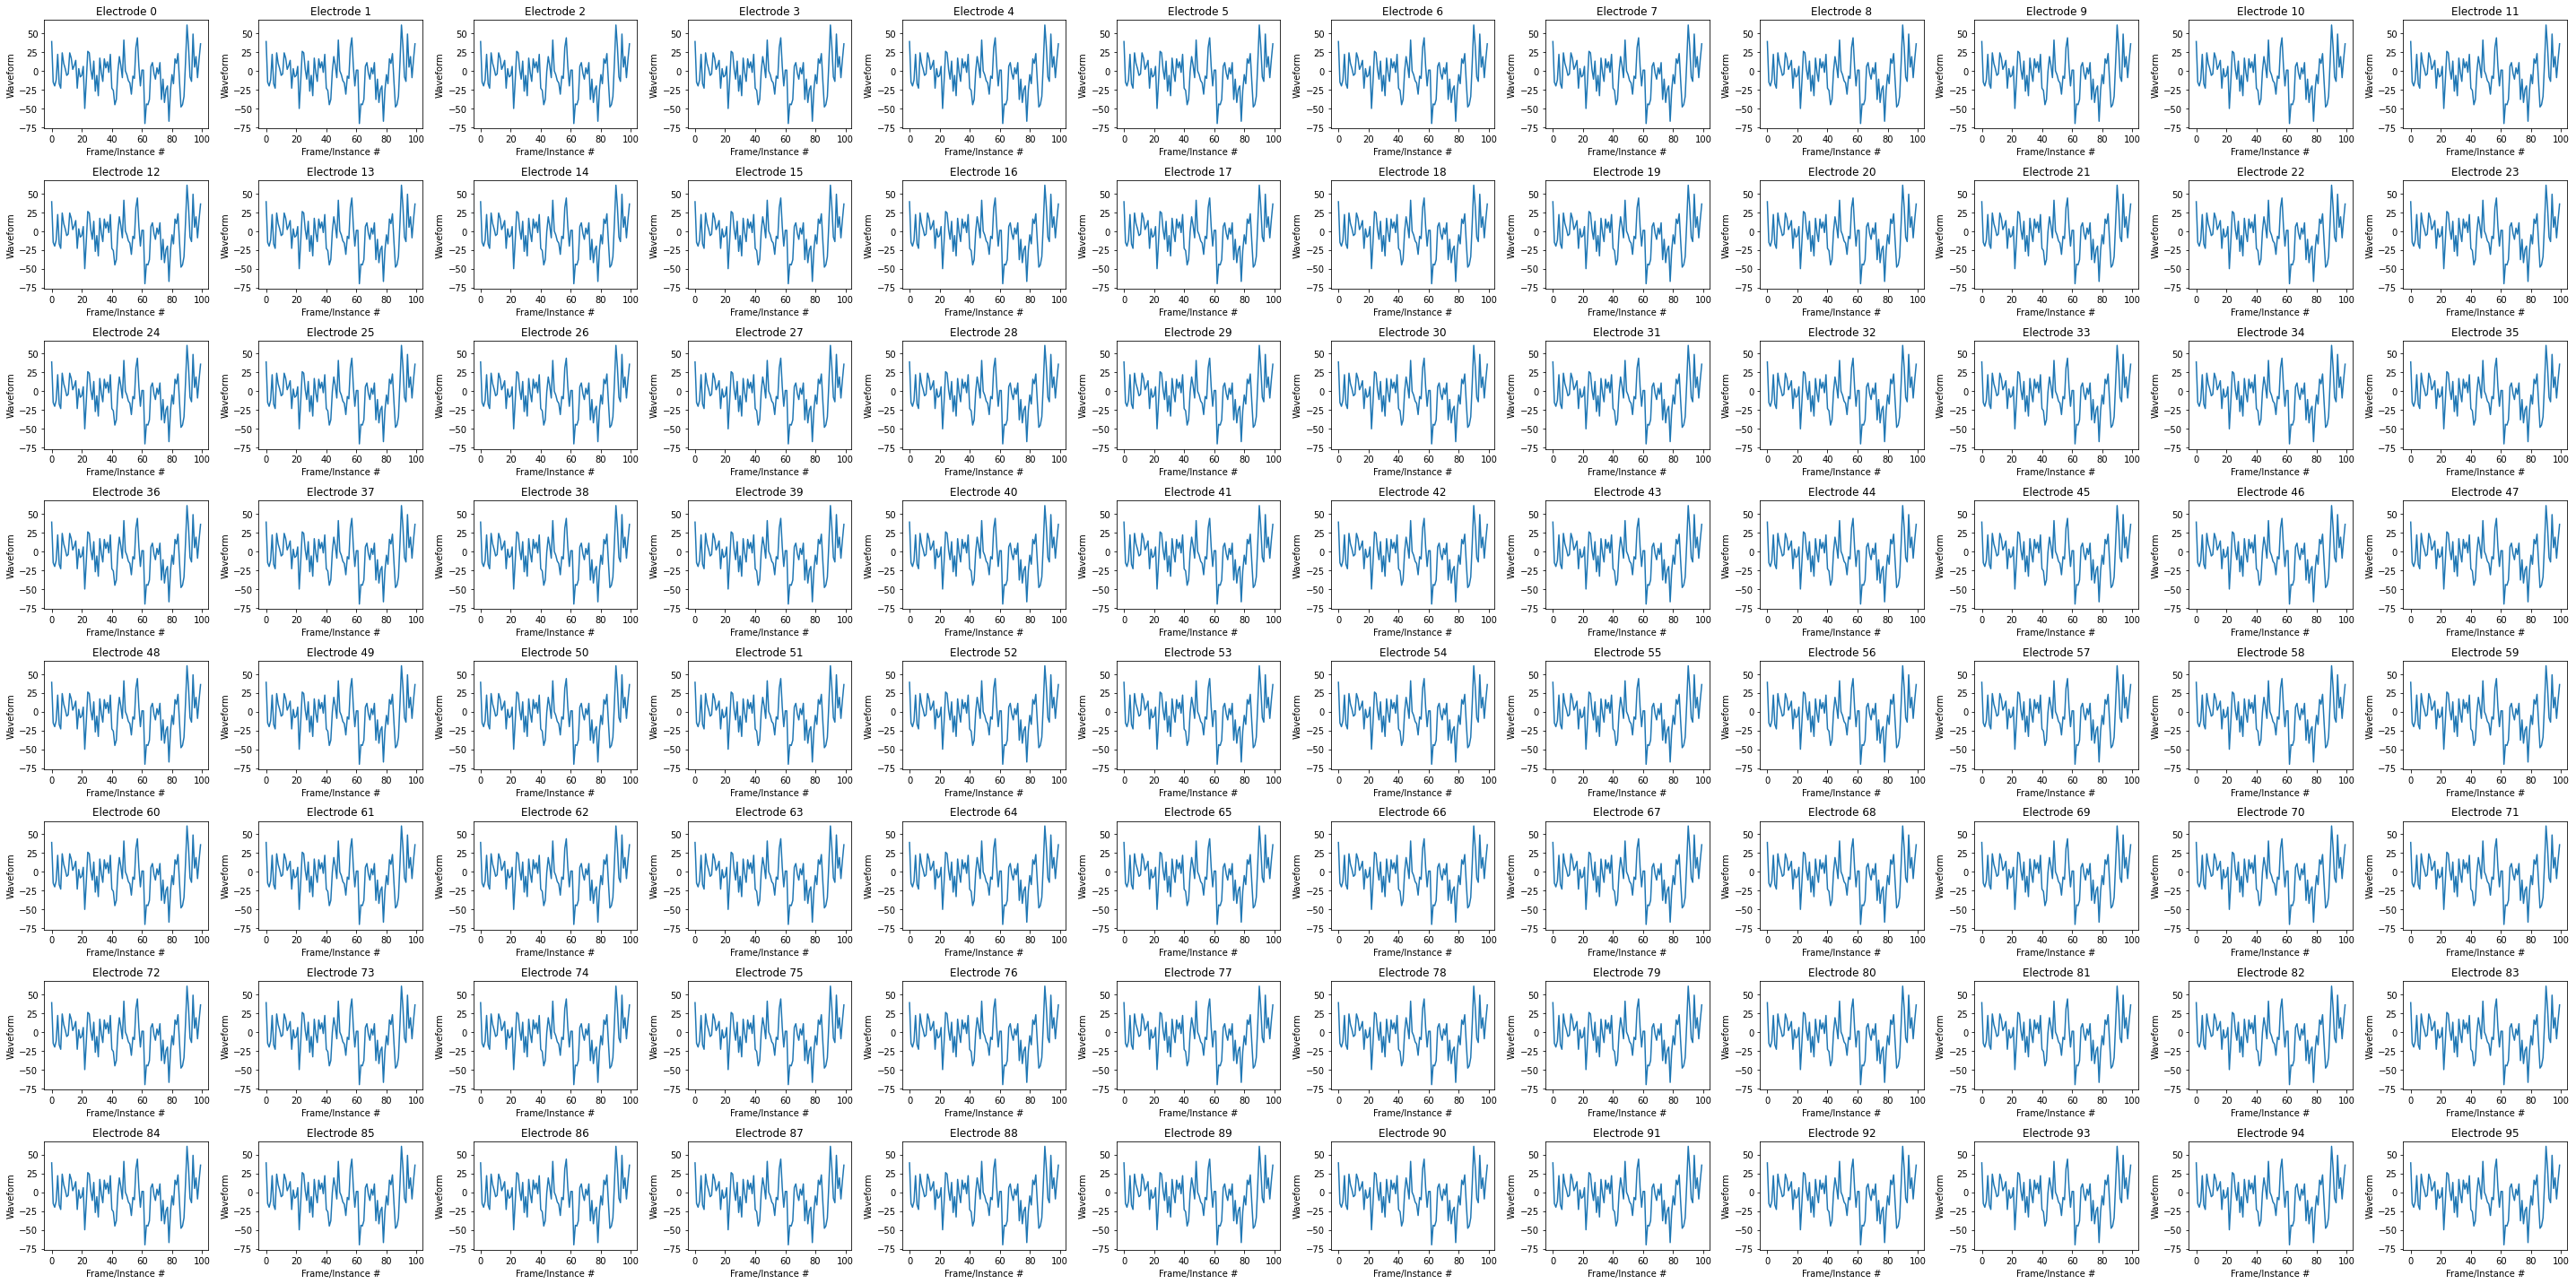

In [47]:
nrows,ncols=8, 12
f, ax = plt.subplots(nrows, ncols)
f.subplots_adjust(top=1.2)
f.set_size_inches(40, 20)
for k in range(nrows*ncols):
    i = k-(int(k/ncols)*ncols)
    j = int(k/ncols)
    ax[j][i].plot(outputs[2]['spike_events']['Waveforms'][:100,k])
    ax[j][i].set_xlabel('Frame/Instance #')
    ax[j][i].set_ylabel('Waveform')
    ax[j][i].set_title('Electrode {}'.format(k))
plt.tight_layout()
plt.show()

In [28]:
len(outputs[2]['digital_events']['TimeStamps'])

3584379

In [30]:
outputs[2]['digital_events'].keys()

dict_keys(['TimeStamps', 'InsertionReason', 'UnparsedData'])

In [38]:
for output in outputs:
    print(output.keys())

dict_keys(['spike_events', 'digital_events'])
dict_keys(['spike_events', 'digital_events'])
dict_keys(['spike_events', 'digital_events'])
dict_keys(['spike_events', 'digital_events'])
dict_keys(['spike_events'])
dict_keys(['spike_events'])
dict_keys(['spike_events'])
dict_keys(['spike_events'])


In [39]:
for output in outputs:
    print(len(output['digital_events']['TimeStamps']),len(output['digital_events']['InsertionReason']),sum(output['digital_events']['InsertionReason']))

2393347 2393347 2393347
3583068 3583068 3583068
3584379 3584379 3584379
3597313 3597313 3597313


KeyError: 'digital_events'

In [44]:
outputs[0].extended_headers

AttributeError: 'dict' object has no attribute 'extended_headers'

In [45]:
outputs[0].processroicomments()

AttributeError: 'dict' object has no attribute 'processroicomments'

In [ ]:
for output in outputs:
    np.sum([((out & 0xFF00) >> 8)==0x02 for out in output['digital_events']['UnparsedData']])